## The Boundaries of the Ocean
- examin the space that the water lives in
- define by the `ocean bottom(the bathymetry)` and the `top(the free surface)`

## Spatial coordinates and Boundaries
- `Longitude: φ`,  `Latitude: λ`
- `Bottom: H=H(φ,λ)`, `Surface: η=η(φ,λ,t)`, and the ocean has no side boundaries!!!!!!!
### the vertical coordinate : z
- z=0 at sea level
- `geoid` : isosurfaces of `gravitational` + `centrifugal potential`
- geoid determined by distribution of `mass` within the Earth + planetary `rotation rate`, always perpendicular to gravity vector and varies on O over Earth' surface
- `free surface` derivates from the geoid due to ocean mean circulation and waves. it varies on O, so negligible contribution to overall ocean volume.

## The Bottom
- to look at the bottom boundary of the ocean, we will load data from `NGDC ETOPO5 database` from the IRI Data

In [ ]:
# pip install hvplot


  Using cached bleach-6.2.0-py3-none-any.whl.metadata (30 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/5.9 MB ? eta -:--:--
   ---------------------------------------  5.8/5.9 MB 32.0 MB/s eta 0:00:01
   ---------------------------------------- 5.9/5.9 MB 24.1 MB/s  0:00:00
   ---------------------------------------- 0.0/30.1 MB ? eta -:--:--
   -------- ------------------------------- 6.0/30.1 MB 30.8 MB/s eta 0:00:01
   ----------------- ---------------------- 13.1/30.1 MB 31.6 MB/s eta 0:00:01
   --------------------------- ------------ 20.7/30.1 MB 32.7 MB/s eta 0:00:01
   ------------------------------------ --- 27.8/30.1 MB 33.2 MB/s eta 0:00:01
   ---------------------------------------- 30.1/30.1 MB 29.4 MB/s  0:00:01
Using cached bleach-6.2.0-py3-none-any.whl (163 kB)
Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)

   ----- ----------------------------------  2/15 [tqdm]
   -------- 

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 5)
import hvplot.xarray

In [9]:
# adding module
import geoviews as gv
import cartopy.crs as ccrs

In [2]:
# dataset loading
ds = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NGDC/.ETOPO5/dods')
ds = ds.rename({'X' : 'lon', 'Y': 'lat'})
ds['elev_ocean'] = ds['elev'].where(ds['elev']<0).load()
ds

<xarray.Dataset> Size: 56MB
Dimensions:     (lon: 4320, lat: 2160)
Coordinates:
  * lon         (lon) float32 17kB 0.0 0.08333 0.1667 0.25 ... 359.8 359.8 359.9
  * lat         (lat) float32 9kB 90.0 89.92 89.83 ... -89.75 -89.83 -89.92
Data variables:
    elev        (lat, lon) int16 19MB -4290 -4290 -4290 -4290 ... 2774 2774 2774
    elev_ocean  (lat, lon) float32 37MB -4.29e+03 -4.29e+03 ... nan nan
Attributes:
    dataset_documentation.html:  http://iridl.ldeo.columbia.edu/SOURCES/.NOAA...
    Conventions:                 IRIDL
    description:                 ETOPO5 5x5 minute land surface elevations an...

- `hvplot` makes interactive plot.
- so we `zoom` graph, `panning` freely, and use `hover tooltips`.

In [ ]:
#pip install datashader

   ---------------------------------------- 0.0/18.3 MB ? eta -:--:--
   ------- -------------------------------- 3.4/18.3 MB 18.3 MB/s eta 0:00:01
   --------------------- ------------------ 9.7/18.3 MB 24.2 MB/s eta 0:00:01
   ------------------------------------ --- 16.5/18.3 MB 27.4 MB/s eta 0:00:01
   ---------------------------------------- 18.3/18.3 MB 26.3 MB/s  0:00:00

   -------------------------- ------------- 2/3 [datashader]
   -------------------------- ------------- 2/3 [datashader]
   -------------------------- ------------- 2/3 [datashader]
   -------------------------- ------------- 2/3 [datashader]
   -------------------------- ------------- 2/3 [datashader]
   ---------------------------------------- 3/3 [datashader]

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install jupyter_bokeh

  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.14-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl.metadata (20 kB)
Note: you may need to restart the kernel to use updated packages.
Using cached ipywidgets-8.1.7-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl (216 kB)
Using cached widgetsnbextension-4.0.14-py3-none-any.whl (2.2 MB)

   -------------------- ------------------- 2/4 [ipywidgets]
   ---------------------------------------- 4/4 [jupyter_bokeh]



In [8]:
pip install geoviews

   ---------------------------------------- 0.0/548.7 kB ? eta -:--:--
   ---------------------------------------- 548.7/548.7 kB 6.2 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
ds['elev_ocean'].hvplot('lon', 'lat', clim = (-8000, 0), rasterize = True, width = 1000, height = 500, cmap = 'ocean')
# rasterize = True는 벡터 그래픽을 raster 이미지로 변환
# clim은 컬러 범위이다.


BokehModel(combine_events=True, render_bundle={'docs_json': {'8fa889eb-0410-4730-a800-298d2fd3c922': {'version…

In [11]:
ds['elev'].hvplot('lon', 'lat', 
                  crs = ccrs.PlateCarree(), projection = ccrs.Orthographic(-90, 30), clim = (-5000, 5000), rasterize = True,
                  geo = True, coastline=True,
                  title = 'Global Ocean Bathymetry')

c:\Users\dnjst\miniconda3\envs\geo_env\lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


BokehModel(combine_events=True, render_bundle={'docs_json': {'4cc7a2d4-bf0d-4740-a715-8566d3970292': {'version…

## The Ocean Volume

Assuming spherical geometry

$$
\begin{align}
V &= \iiint_{\text{ocean}} dV \\
&= \int_{-\pi}^{\pi} \int_{0}^{2\pi} R^2 \cos(\lambda) d\lambda d\phi \int_{-H}^{\eta} dz \tag{1} \\
&= \iint_{\text{surface}} (\eta + H)(\lambda, \phi) dA
\end{align}
$$

Area element: $dA = R^2 \cos(\lambda) d\lambda d\phi$

In [13]:
earth_radius = 6.371e6
tot_area = (4 * np.pi * earth_radius**2)

# dA
d_lon = np.radians((ds['lon'][1] - ds['lon'][0]).values)
d_lat = np.radians((ds['lat'][1] - ds['lat'][0]).values)
# use broadcasting
# (0*ds.elev + 1)은 (lat, lon) 차원을 갖는 1로 채워진 2D 배열, 즉 cos(lat) 배열이 lon 차원이 없기 때문에 이 배열의 값들을 모든 경도(lon) 방향으로 복제하여 2D 배열로 만든다.
ds['area'] = earth_radius**2 * np.abs(d_lon * d_lat) * np.cos(np.radians(ds.lat)) * (0*ds.elev + 1)

In [17]:
ds['area_ocean'] = ds.area.where(ds['elev'] < 0)
np.testing.assert_allclose(ds.area.sum().values, tot_area, rtol=1e-4)

(-8000.0, 8000.0)

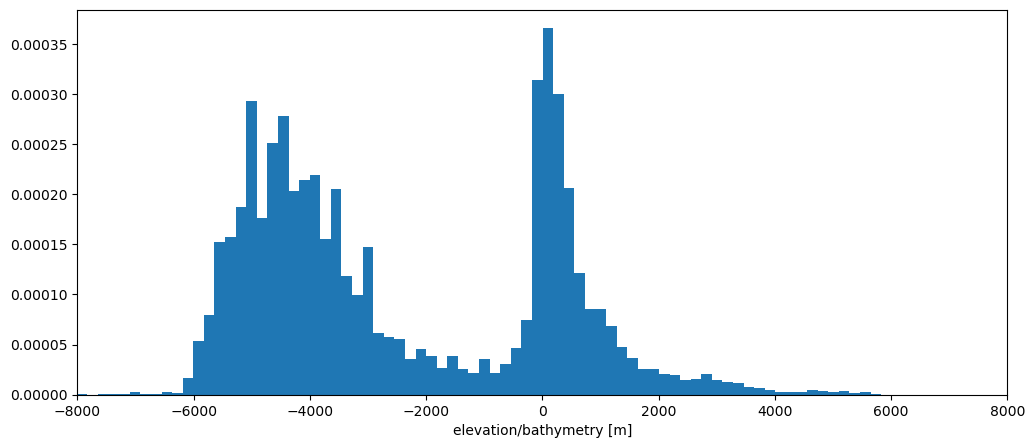

In [ ]:
# ravel() : 다차원 배열을 1차원으로
fig, ax = plt.subplots()
ds['elev'].plot.hist(bins=100, weights = ds['area'].values.ravel(), density=True, ax = ax)
ax.set_xlim([-8000, 8000])

In [25]:
weights = ds['area_ocean'].fillna(0)
print('Fraction ocean', ds['area_ocean'].sum().values/tot_area)
print('Mean ocean Depth', float(ds['elev_ocean'].weighted(weights).mean()), 'm')
print('Max ocean depth', float(ds['elev_ocean'].min()), 'm')

Fraction ocean 0.71395725
Mean ocean Depth -3674.6533203125 m
Max ocean depth -10376.0 m


In [26]:
print('Total ocean volume: ', -float(ds['elev_ocean'].weighted(weights).sum()), 'm^3')

Total ocean volume:  1.3381775315760579e+18 m^3


Text(0.5, 1.0, 'Depth of the Atlantic at 40 N')

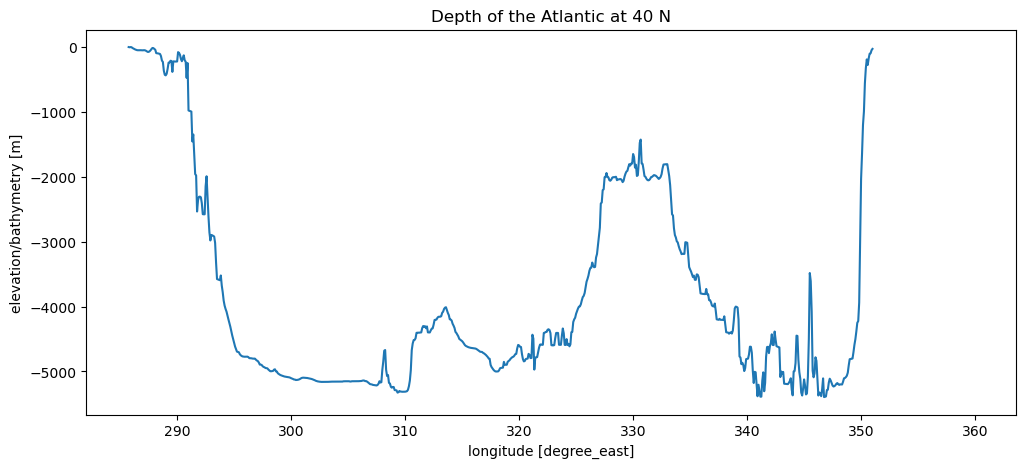

In [27]:
fig, ax = plt.subplots()
ds['elev_ocean'].sel(lat=40, method='nearest', tolerance=1).sel(lon=slice(270, 360)).plot(ax=ax)
ax.set_title('Depth of the Atlantic at 40 N')

Text(0.5, 1.0, 'Depth of the Pacific at 30 N')

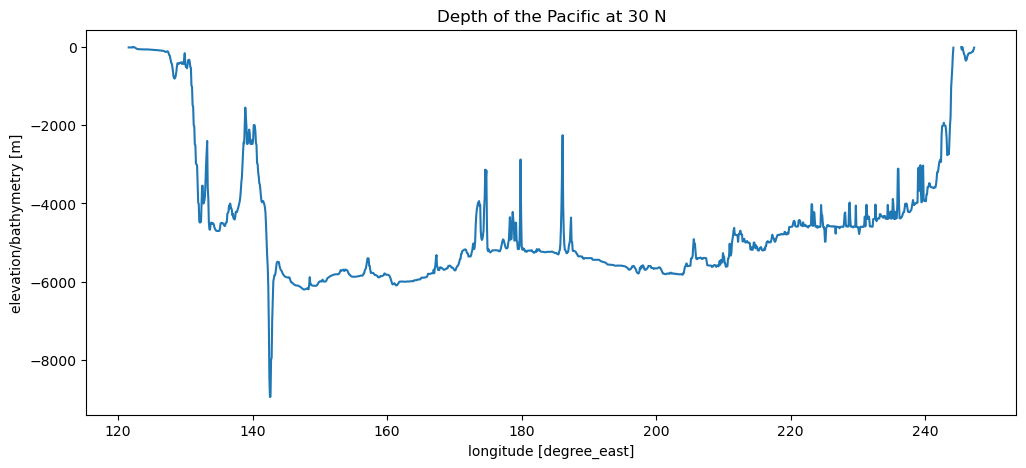

In [31]:
fig, ax = plt.subplots()
ds['elev_ocean'].sel(lat=30, method='nearest', tolerance=1).sel(lon=slice(120, 250)).plot(ax=ax)
ax.set_title('Depth of the Pacific at 30 N')